In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

## 1. Kaggle data extraction

In [86]:
import kaggle
import zipfile
import os

def load_kaggle_data(dataset_name, download_path='.', file_type='csv'):
    """
    Downloads and loads a dataset from Kaggle into a pandas DataFrame.

    Args:
        dataset_name (str): The identifier of the dataset.
        download_path (str): The directory where the dataset will be downloaded.
        file_type (str): The file extension of the data to load (e.g., 'csv', 'json').

    Returns:
        pd.DataFrame: A pandas DataFrame containing the loaded data.
        
    Raises:
        ValueError: If no file of the specified type is found in the dataset.
    """
    # Create the download directory if it doesn't exist
    if not os.path.exists(download_path):
        os.makedirs(download_path)
    
    print(f"Downloading dataset '{dataset_name}'...")
    
    try:
        # Download the dataset and unzip it
        kaggle.api.dataset_download_files(
            dataset_name, 
            path=download_path, 
            unzip=True
        )
        print("Download complete and files unzipped.")
    except Exception as e:
        print(f"An error occurred during download: {e}")
        return None

    # Find the data file in the downloaded directory
    data_file = None
    for file in os.listdir(download_path):
        if file.endswith(f'.{file_type}'):
            data_file = os.path.join(download_path, file)
            break
            
    if not data_file:
        raise ValueError(f"No .{file_type} file found in the downloaded dataset.")
        
    # Load the data into a DataFrame
    try:
        if file_type == 'csv':
            try:
              df = pd.read_csv(data_file)
            except ValueError as e:
              df = pd.read_csv(data_file,encoding="windows-1252", on_bad_lines='skip')
        elif file_type == 'json':
            df = pd.read_json(data_file)
        else:
            print(f"Unsupported file type: .{file_type}. Only CSV and JSON are supported.")
            return None
        
        print("Data loaded into a pandas DataFrame.")
        return df
        
    except Exception as e:
        print(f"An error occurred while loading the data: {e}")
        return None


superstore = load_kaggle_data('vivek468/superstore-dataset-final',download_path='Users\phuocdh\Documents')
if superstore is not None:
    print("\nFirst 5 rows of the DataFrame:")
    print(superstore.head())



Dataset URL: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final
Download complete and files unzipped.
Data loaded into a pandas DataFrame.

First 5 rows of the DataFrame:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  F

## 2. Data Transformation

In [87]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [88]:
superstore.duplicated().sum()

np.int64(0)

In [89]:
superstore.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [90]:
#Coverting date columns to datetime format
def convert_to_datetime(column):
    for i in superstore.columns:
        if 'date' in i.lower():
            superstore[i] = pd.to_datetime(superstore[i])
            print(f"Converted {i} to datetime")

convert_to_datetime(superstore)

Converted Order Date to datetime
Converted Ship Date to datetime


In [91]:
#Creating new columns for EDA
superstore['Shipping Days'] = (superstore['Ship Date'] - superstore['Order Date']).dt.days
superstore['Order Day'] = superstore['Order Date'].dt.day
superstore['Order Month'] = superstore['Order Date'].dt.month
superstore['Order Month Name'] = superstore['Order Date'].dt.month_name()
superstore['Profit Margin'] = (superstore['Profit'] / superstore['Sales']) * 100
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Days,Order Day,Order Month,Order Month Name,Profit Margin
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,8,11,November,16.00
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,8,11,November,30.00
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,12,6,June,47.00
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,11,10,October,-40.00
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,11,10,October,11.25


In [92]:
superstore['YearMonth'] = superstore['Order Date'].dt.to_period('M').dt.to_timestamp()

## 3. Exploratory Data Analysis

In [93]:
superstore.groupby('Ship Mode')['Shipping Days'].mean().reset_index()

,Ship Mode,Shipping Days
0,First Class,2.182705
1,Same Day,0.044199
2,Second Class,3.238046
3,Standard Class,5.006535


C:\Users\phuocdh\AppData\Local\Temp\ipykernel_27500\1911156211.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=superstore, x='Category', y='Profit', ax=axes[0, 0],palette="Set2")
C:\Users\phuocdh\AppData\Local\Temp\ipykernel_27500\1911156211.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_shipping, x='Ship Mode', y='Shipping Days', ax=axes[2, 0],palette="Set2")
C:\Users\phuocdh\AppData\Local\Temp\ipykernel_27500\1911156211.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[2,0].legend()
C:\Users\phuocdh\AppData\Local\Temp\ipykernel_2750

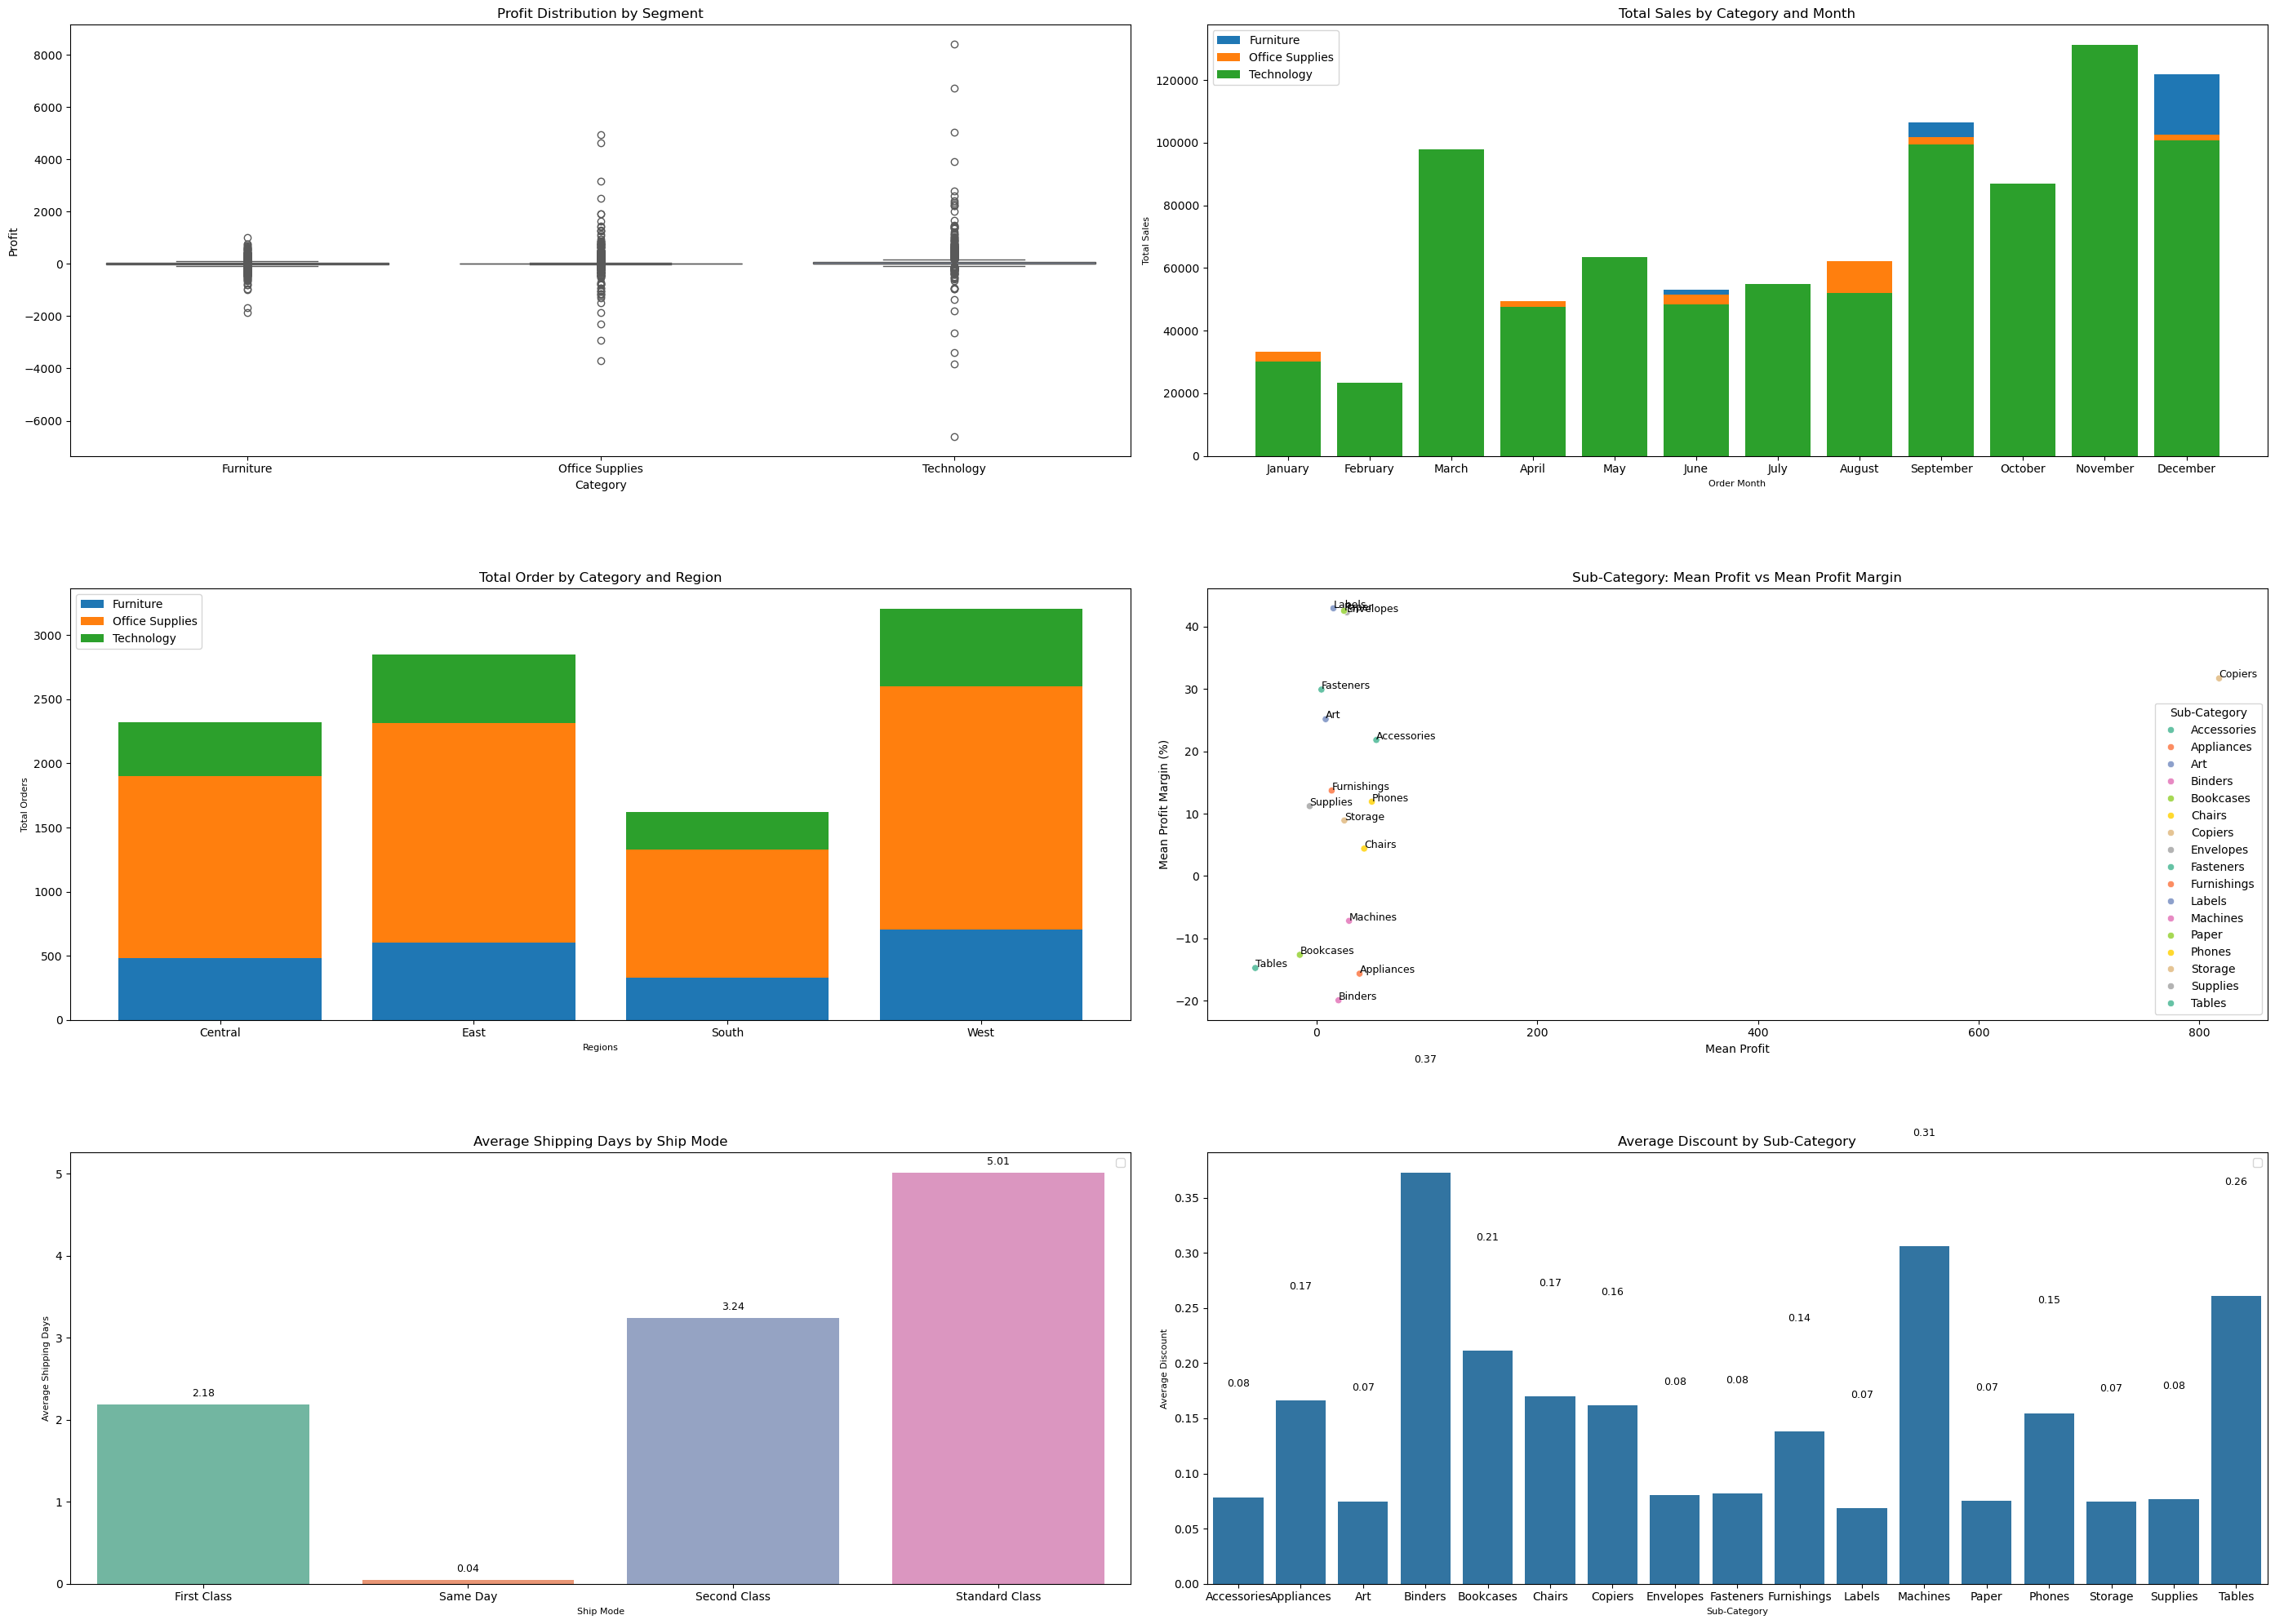

In [94]:

import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(28, 20))

# Plot boxplot in the top-left subplot
sns.boxplot(data=superstore, x='Category', y='Profit', ax=axes[0, 0],palette="Set2")
axes[0, 0].set_title('Profit Distribution by Segment')

# Hide unused subplots
monthly_sales = superstore.groupby(['Category','Order Month Name', 'Order Month'])['Sales'].sum().reset_index()
monthly_sales.sort_values('Order Month', inplace=True)

for x in monthly_sales['Category'].unique():
    category_data = monthly_sales[monthly_sales['Category'] == x]
    axes[0,1].bar(category_data['Order Month Name'], category_data['Sales'], label=x)
axes[0,1].set_title('Total Sales by Category and Month', fontsize=12)
axes[0,1].set_xlabel('Order Month', fontsize=8)            
axes[0,1].set_ylabel('Total Sales', fontsize=8)
axes[0,1].legend()

region_orders = superstore.groupby(['Category','Region'])['Order ID'].count().reset_index()
bottom_values = np.zeros(len(regions))
# Plot stacked bars
for x in region_orders['Category'].unique():
    region_cat = region_orders[region_orders['Category'] == x]
    axes[1,0].bar(region_cat['Region'], region_cat['Order ID'], bottom=bottom_values, label=x)
    bottom_values += region_cat['Order ID'].values  # update bottom for next stack
axes[1,0].set_title('Total Order by Category and Region', fontsize=12)
axes[1,0].set_xlabel('Regions', fontsize=8)            
axes[1,0].set_ylabel('Total Orders', fontsize=8)
axes[1,0].legend()


cat_profit = superstore.groupby('Sub-Category').agg({'Profit':'mean','Profit Margin':'mean'}).reset_index()
sns.scatterplot(data=cat_profit,  x='Profit', y='Profit Margin',hue='Sub-Category', ax=axes[1, 1],palette="Set2")
for i in range(len(cat_profit)):
    axes[1, 1].text(cat_profit['Profit'][i] + 0.1, cat_profit['Profit Margin'][i] + 0.1, cat_profit['Sub-Category'][i], fontsize=9)

axes[1,1].set_xlabel("Mean Profit")
axes[1,1].set_ylabel("Mean Profit Margin (%)")
axes[1,1].set_title("Sub-Category: Mean Profit vs Mean Profit Margin")


avg_shipping = superstore.groupby('Ship Mode')['Shipping Days'].mean().reset_index()
sns.barplot(data=avg_shipping, x='Ship Mode', y='Shipping Days', ax=axes[2, 0],palette="Set2")
for i in range(len(avg_shipping)):
    axes[2, 0].text(i, avg_shipping['Shipping Days'][i] + 0.1, round(avg_shipping['Shipping Days'][i],2), ha='center', fontsize=9)
axes[2,0].set_title('Average Shipping Days by Ship Mode', fontsize=12)
axes[2,0].set_xlabel('Ship Mode', fontsize=8)            
axes[2,0].set_ylabel('Average Shipping Days', fontsize=8)
axes[2,0].legend()


avg_discount = superstore.groupby('Sub-Category')['Discount'].mean().reset_index()
sns.barplot(data=avg_discount, x='Sub-Category', y='Discount', ax=axes[2, 1])
for i in range(len(avg_discount)):
    axes[2, 1].text(i, avg_discount['Discount'][i] + 0.1, round(avg_discount['Discount'][i],2), ha='center', fontsize=9)
axes[2,1].set_title('Average Discount by Sub-Category', fontsize=12)
axes[2,1].set_xlabel('Sub-Category', fontsize=8)            
axes[2,1].set_ylabel('Average Discount', fontsize=8)
axes[2,1].legend()


plt.tight_layout()


## Key Insights

- Technology dominates profitability and sales, especially during peak months.
- Office Supplies leads in order volume but not in revenue.
- Regional performance shows West as the strongest market.
- Shipping delays in Standard Class could impact customer satisfaction.
- Discounting is heavily skewed toward certain sub-categories.

## Recommendations
1. Optimize Shipping

Reduce delivery time for Standard Class by improving logistics or offering incentives for faster shipping.
Promote Same Day and First Class options for high-value customers.



2. Refine Discount Strategy

Review high-discount items like Binders and Machines to ensure profitability is not compromised.
Consider targeted promotions for underperforming categories (e.g., Paper, Binders) to boost sales without excessive discounting.


3. Regional Strategy

Strengthen presence in South region through localized campaigns or improved distribution.
Maintain strong performance in West region with loyalty programs and premium services.

In [95]:
def get_mean_and_moe(group):
    """
    Calculates the mean and margin of error for a given group of data.
    """
    confidence_level = 0.95
    n = len(group)
    mean = np.mean(group)

    if n < 2:
        return mean, np.nan  # Return NaN for margin of error if not enough data

    # Calculate the confidence interval bounds
    confidence_interval = st.t.interval(
        confidence=confidence_level,
        df=n - 1,
        loc=mean,
        scale=st.sem(group)
    )

    # Calculate the margin of error from the confidence interval
    moe = (confidence_interval[1] - confidence_interval[0]) / 2
    return mean, moe

In [96]:
# Group by category and apply the custom function
results = superstore.groupby('Category')['Profit'].apply(get_mean_and_moe)

# Create a DataFrame from the results for better readability
results_df = results.apply(pd.Series).rename(columns={0: 'mean', 1: 'moe'})

# Format the output into strings
results_df['formatted_output'] = results_df.apply(
    lambda row: f"{row['mean']:.2f} \u00B1 {row['moe']:.2f}", axis=1
)

print(results_df)

                      mean        moe formatted_output
Category                                              
Furniture         8.699327   5.793245      8.70 ± 5.79
Office Supplies  20.327050   4.163973     20.33 ± 4.16
Technology       78.752002  19.569112    78.75 ± 19.57


Technology has the highest avg profit  and confidence interval, followed by office supplies and furniture

In [97]:

from scipy.stats import ttest_ind

consumer = superstore[superstore['Segment'] == 'Consumer']['Profit']
corporate = superstore[superstore['Segment'] == 'Corporate']['Profit']

t_stat, p_value = ttest_ind(consumer, corporate, equal_var=False)

if p_value < 0.05:
    print(f" p-value is {p_value} -->There is a significant difference in average profit between Consumer and Corporate segments.")
else:
    print(f" p-value is {p_value} --> No difference in average profit between Consumer and Corporate segments.")


 p-value is 0.3922774231363092 --> No difference in average profit between Consumer and Corporate segments.


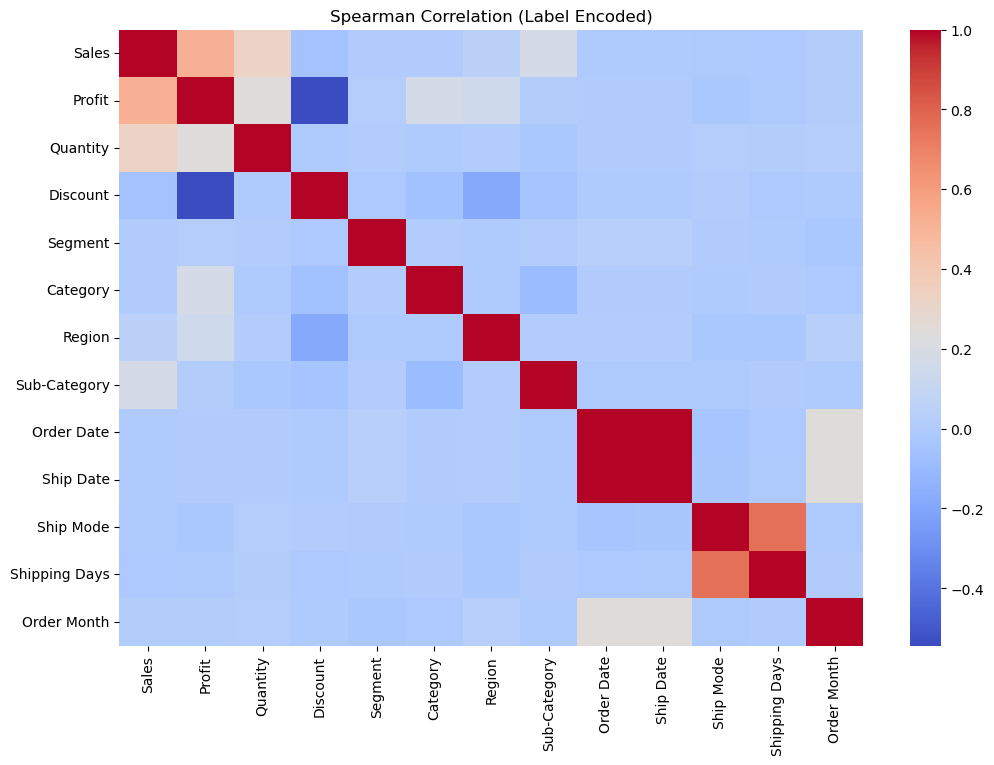

In [98]:

from sklearn.preprocessing import LabelEncoder

# Select relevant columns
selected_columns = ['Sales', 'Profit', 'Quantity', 'Discount', 'Segment', 'Category',
                    'Region', 'Sub-Category', 'Order Date', 'Ship Date', 'Ship Mode',
                    'Shipping Days', 'Order Month']

df_encoded = superstore[selected_columns].copy()

# Encode categorical columns
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Spearman correlation
corr = df_encoded.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Spearman Correlation (Label Encoded)")
plt.show()

Discount management is critical because it strongly impacts profit negatively.
Shipping performance is predictable based on ship mode

In [111]:


# Step 1: Identify sub-categories
sub_categories = superstore['Sub-Category'].unique()
balanced_data = []

# Step 2: Balance sample sizes for each sub-category
for sub in sub_categories:
    no_discount = superstore[(superstore['Sub-Category'] == sub) & (superstore['Discount'] == 0)]
    discount = superstore[(superstore['Sub-Category'] == sub) & (superstore['Discount'] > 0)]

    min_size = min(len(no_discount), len(discount))
    if min_size == 0:
        continue  # Skip if one group is empty

    no_discount_sample = no_discount.sample(n=min_size, random_state=42)
    discount_sample = discount.sample(n=min_size, random_state=42)

    balanced_data.append(no_discount_sample)
    balanced_data.append(discount_sample)

# Step 3: Combine balanced samples
balanced_df = pd.concat(balanced_data)

# Step 4: Create a binary discount flag
balanced_df['Discounted'] = balanced_df['Discount'] > 0

# Step 5: Calculate mean profit per group
grouped = balanced_df.groupby(['Sub-Category', 'Discounted'])['Profit'].mean().reset_index()

# Step 6: Pivot for comparison
pivot = grouped.pivot(index='Sub-Category', columns='Discounted', values='Profit').reset_index()
pivot.columns = ['Sub-Category', 'Mean_Profit_No_Discount', 'Mean_Profit_Discounted']

# Step 7: Calculate difference
pivot['Profit_Diff'] = pivot['Mean_Profit_Discounted'] - pivot['Mean_Profit_No_Discount']

# Display result
print(pivot)

   Sub-Category  Mean_Profit_No_Discount  Mean_Profit_Discounted  Profit_Diff
0   Accessories                69.659949               21.866388   -47.793561
1    Appliances                92.723843              -25.875542  -118.599385
2           Art                10.746848                3.849619    -6.897229
3       Binders               116.660091                1.440763  -115.219328
4     Bookcases               101.261862              -42.395713  -143.657575
5        Chairs               164.910497               13.772936  -151.137561
6       Copiers              1616.187950              554.901214 -1061.286736
7     Envelopes                32.904771               19.482277   -13.422493
8     Fasteners                 5.091473                3.340596    -1.750878
9   Furnishings                30.914805               -9.815610   -40.730415
10       Labels                18.445390                8.993264    -9.452126
11     Machines               935.786976             -223.626683